In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import nltk

In [8]:
df = pd.read_csv('df_final.csv')

In [41]:
aziende_df = pd.read_csv('aziende.csv')
esgs_df = pd.read_csv('esgs.csv')

In [26]:
aziende_df = aziende_df.drop('Unnamed: 0', axis=1)

In [27]:
aziende_df.head(2)

,BRAND,ID,SECTOR,PRODUCT CATEGORY,COUNTRY,BUSINESS MODEL,CONGLOMERATE/Gruppo di riferimento,Market segment,Core business,Business segment,Targets,Listing,Country,Business model,Conglomerate/ Company/ Gruppo di riferimento,Employees,"Fatturato (Euro) FY, 2022","Utile lordo FY, 2022","Utile/perdita FY, 2022",Non-financial disclosure
0,&Other Stories,MM1,MASS MARKET,APP,SWE,BRD,H&M Group,BRIDGE,APP,Accessories / Apparel / Bags / Fragrance / Jew...,WOM,STK,SWE,BRD,H&M Group,NaN,NaN,NaN,NaN,YES
1,ACNE Studios,E1,EMERGENTI,APP,SWE,BRD,Acne Studios AB,BRIDGE,APP,Accessories / Apparel / Bags / Denim / Shoes /...,WOM MEN,N,SWE,BRD,Acne Studios AB,NaN,NaN,NaN,NaN,YES


In [44]:
esgs_df.head(2)

,BRAND,HELPING LIMIT GLOBAL WARMING TO 1.5 °C,Riduzione delle emissioni di CO2 dirette (Scope 1),Riduzione delle emissioni di CO2 indirette (Scope 2 e 3),Riduzione emissioni GHG assolute dello Scope 1 e Scope 2 (science-based target),Riduzione emissioni GHG assolute dello Scope 3 (science-based target),Riduzione emissioni carboniche per prodotto,Riduzione emissioni assolute nei negozi e nella casa-madre,Allinearsi ai target SBTi,Dimezzare le emissioni di GHG e CO2e,...,"Piattaforma meccatronica elettrica, digitale e scalabile per fornire ai clienti in modo rapido ed efficiente funzioni e tecnologie innovative","Modelli di business basati sui dati, nuovi servizi di mobilità e guida automatizzata",Fornire servizi di ricarica e di energia e investire nella costruzione di una rete aperta di ricarica rapida,Platform-based vehicles integrated with key technologies,Sviluppare nuovo mobility portfolio,Anticipating and Forecasting,Incremento desiderabilità del brand,Drive technological innovation while pursuing excellence in design and craftsmanship,PUBLICATION OF A GROUP SUSTAINABILITY REPORT WITH GRI STANDARDS,Richiedere ai fornitori di auto-valutarsi e di rendicontare le proprie performance ambientali
0,&Other Stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACNE Studios,NaN,NaN,NaN,2030.0,2030.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# esgs_df = esgs_df.drop('Unnamed: 0', axis=1)
esgs_df = esgs_df.transpose()

In [43]:
esgs_df.rename(columns={'Azione': 'BRAND'}, inplace=True)

In [48]:
esgs_df.replace(1, 2030)

,BRAND,HELPING LIMIT GLOBAL WARMING TO 1.5 °C,Riduzione delle emissioni di CO2 dirette (Scope 1),Riduzione delle emissioni di CO2 indirette (Scope 2 e 3),Riduzione emissioni GHG assolute dello Scope 1 e Scope 2 (science-based target),Riduzione emissioni GHG assolute dello Scope 3 (science-based target),Riduzione emissioni carboniche per prodotto,Riduzione emissioni assolute nei negozi e nella casa-madre,Allinearsi ai target SBTi,Dimezzare le emissioni di GHG e CO2e,...,"Piattaforma meccatronica elettrica, digitale e scalabile per fornire ai clienti in modo rapido ed efficiente funzioni e tecnologie innovative","Modelli di business basati sui dati, nuovi servizi di mobilità e guida automatizzata",Fornire servizi di ricarica e di energia e investire nella costruzione di una rete aperta di ricarica rapida,Platform-based vehicles integrated with key technologies,Sviluppare nuovo mobility portfolio,Anticipating and Forecasting,Incremento desiderabilità del brand,Drive technological innovation while pursuing excellence in design and craftsmanship,PUBLICATION OF A GROUP SUSTAINABILITY REPORT WITH GRI STANDARDS,Richiedere ai fornitori di auto-valutarsi e di rendicontare le proprie performance ambientali
0,&Other Stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACNE Studios,NaN,NaN,NaN,2030.0,2030.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Adidas,NaN,NaN,NaN,2030.0,2030.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aeffe S.p.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asos,NaN,NaN,NaN,2030.0,2030.0,NaN,NaN,2025.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Valentino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,NaN
98,Vans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Versace,NaN,NaN,NaN,2030.0,2030.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,VF Corporation,NaN,NaN,NaN,2030.0,2030.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df = pd.merge(aziende_df, esgs_df, on='BRAND', how='inner')

# Display the first few rows of the merged DataFrame to confirm the merge
df.head()

,BRAND,ID,SECTOR,PRODUCT CATEGORY,COUNTRY,BUSINESS MODEL,CONGLOMERATE/Gruppo di riferimento,Market segment,Core business,Business segment,...,"Piattaforma meccatronica elettrica, digitale e scalabile per fornire ai clienti in modo rapido ed efficiente funzioni e tecnologie innovative","Modelli di business basati sui dati, nuovi servizi di mobilità e guida automatizzata",Fornire servizi di ricarica e di energia e investire nella costruzione di una rete aperta di ricarica rapida,Platform-based vehicles integrated with key technologies,Sviluppare nuovo mobility portfolio,Anticipating and Forecasting,Incremento desiderabilità del brand,Drive technological innovation while pursuing excellence in design and craftsmanship,PUBLICATION OF A GROUP SUSTAINABILITY REPORT WITH GRI STANDARDS,Richiedere ai fornitori di auto-valutarsi e di rendicontare le proprie performance ambientali
0,&Other Stories,MM1,MASS MARKET,APP,SWE,BRD,H&M Group,BRIDGE,APP,Accessories / Apparel / Bags / Fragrance / Jew...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACNE Studios,E1,EMERGENTI,APP,SWE,BRD,Acne Studios AB,BRIDGE,APP,Accessories / Apparel / Bags / Denim / Shoes /...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Adidas,S1,SPORTSWEAR,ACTIVE WEAR,GER,BRD,Adidas Group,MM,ACTIVE WEAR,Accessories / Active Wear / Apparel / Bags / F...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Audi,A1,AUTOMOTIVE,Manufacturing & Industrial,GER,GROUP,Gruppo Volkswagen,NaN,Manufacturing & Industrial\n,car services\ndistribution\nelectric vehicles\...,...,NaN,NaN,NaN,NaN,2028.0,NaN,NaN,NaN,NaN,NaN
4,Balenciaga,EU3,EU FASHION,APP,FRA,BRD,Kering Group,PRE,APP,Accessories / Apparel / Bags / Denim / Fragran...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.to_csv('df1.csv')

C:\Users\Spin\AppData\Local\Temp\ipykernel_25944\4142546413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.values, y=sector_counts.index, palette="viridis")


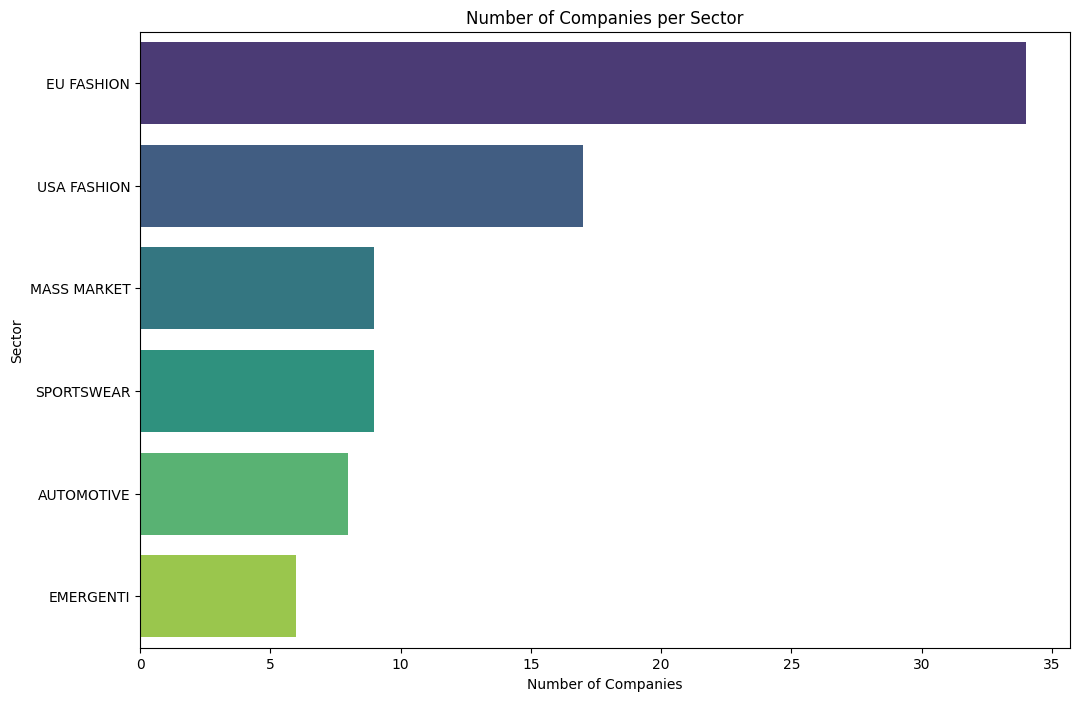

In [51]:
# Count the number of companies per sector
sector_counts = df['SECTOR'].value_counts()

# Generate a bar chart for the number of companies per sector
plt.figure(figsize=(12, 8))
sns.barplot(x=sector_counts.values, y=sector_counts.index, palette="viridis")
plt.title('Number of Companies per Sector')
plt.xlabel('Number of Companies')
plt.ylabel('Sector')
plt.show()

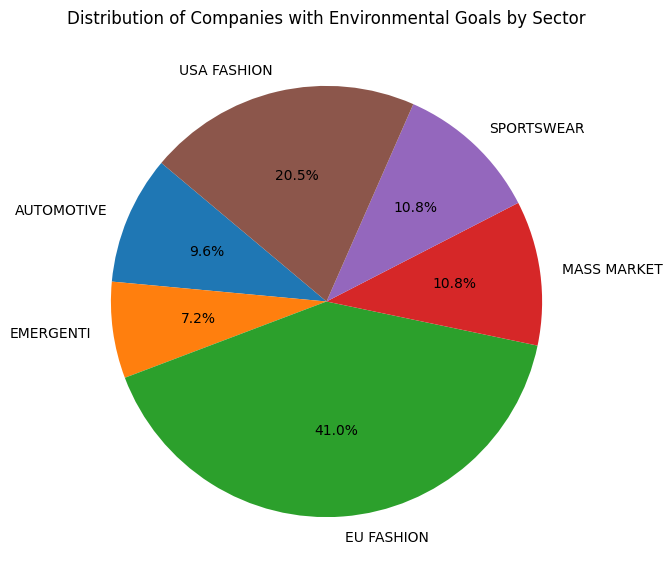

In [52]:
# For demonstration, let's assume there's a column 'Environmental Goal Set' indicating if a company has set any environmental goal.
# Since the actual dataset structure for environmental goals is not specified, this step assumes a hypothetical scenario.

# Create a hypothetical 'Environmental Goal Set' column for demonstration (replace with actual data logic)
df['Environmental Goal Set'] = df.iloc[:, 10:20].notnull().any(axis=1)  # Assuming columns 10 to 20 relate to environmental goals

# Count the number of companies with environmental goals set per sector
env_goals_by_sector = df.groupby('SECTOR')['Environmental Goal Set'].sum()

# Generate a pie chart for the distribution of companies with environmental goals by sector
plt.figure(figsize=(10, 7))
env_goals_by_sector.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies with Environmental Goals by Sector')
plt.ylabel('')  # Hide the y-label as it's not needed for a pie chart
plt.show()


C:\Users\Spin\AppData\Local\Temp\ipykernel_25944\1685910605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=companies_per_goal.values, y=companies_per_goal.index, palette="coolwarm")


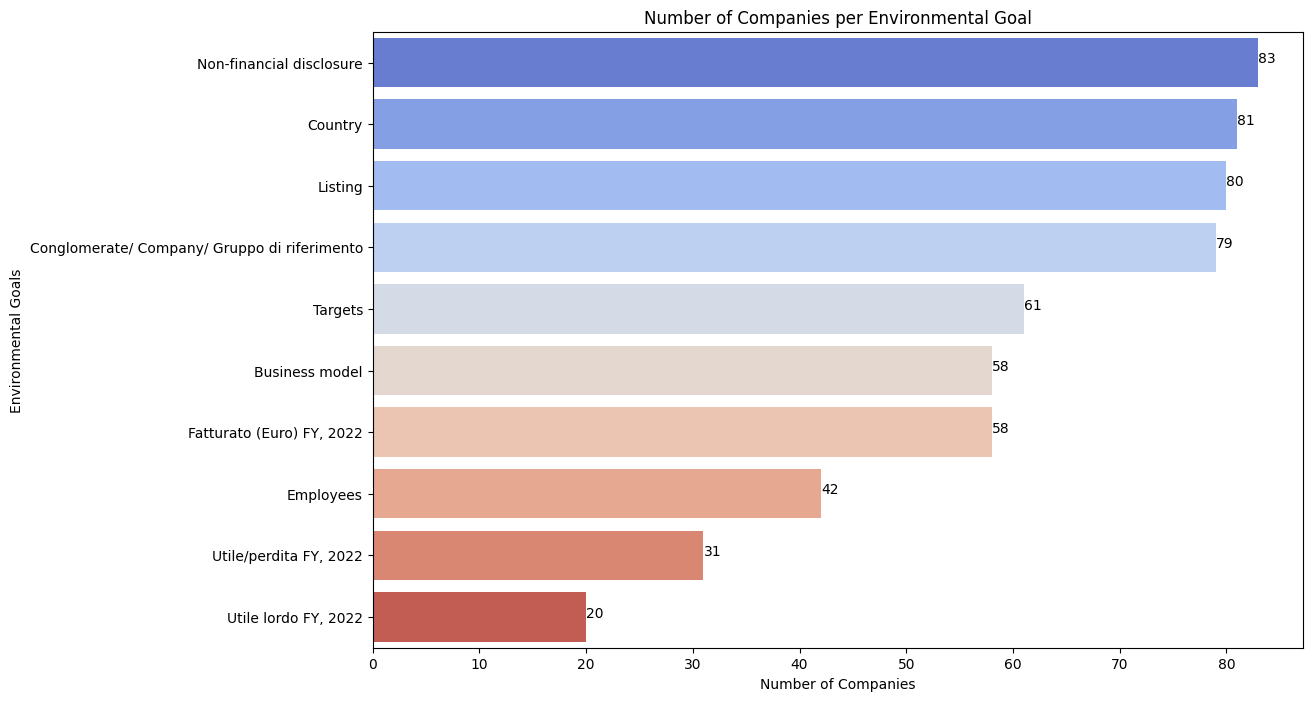

In [53]:
goal_columns = df.columns[10:20]  # Placeholder for actual environmental goal columns
companies_per_goal = df[goal_columns].notnull().sum().sort_values(ascending=False)

# Visualize Number of Companies per Goal
plt.figure(figsize=(12, 8))
sns.barplot(x=companies_per_goal.values, y=companies_per_goal.index, palette="coolwarm")
plt.title('Number of Companies per Environmental Goal')
plt.xlabel('Number of Companies')
plt.ylabel('Environmental Goals')
for index, value in enumerate(companies_per_goal.values):
    plt.text(value, index, str(value))
plt.show()

C:\Users\Spin\AppData\Local\Temp\ipykernel_25944\3930310765.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Goals', y='BRAND', data=top_companies, palette="magma")


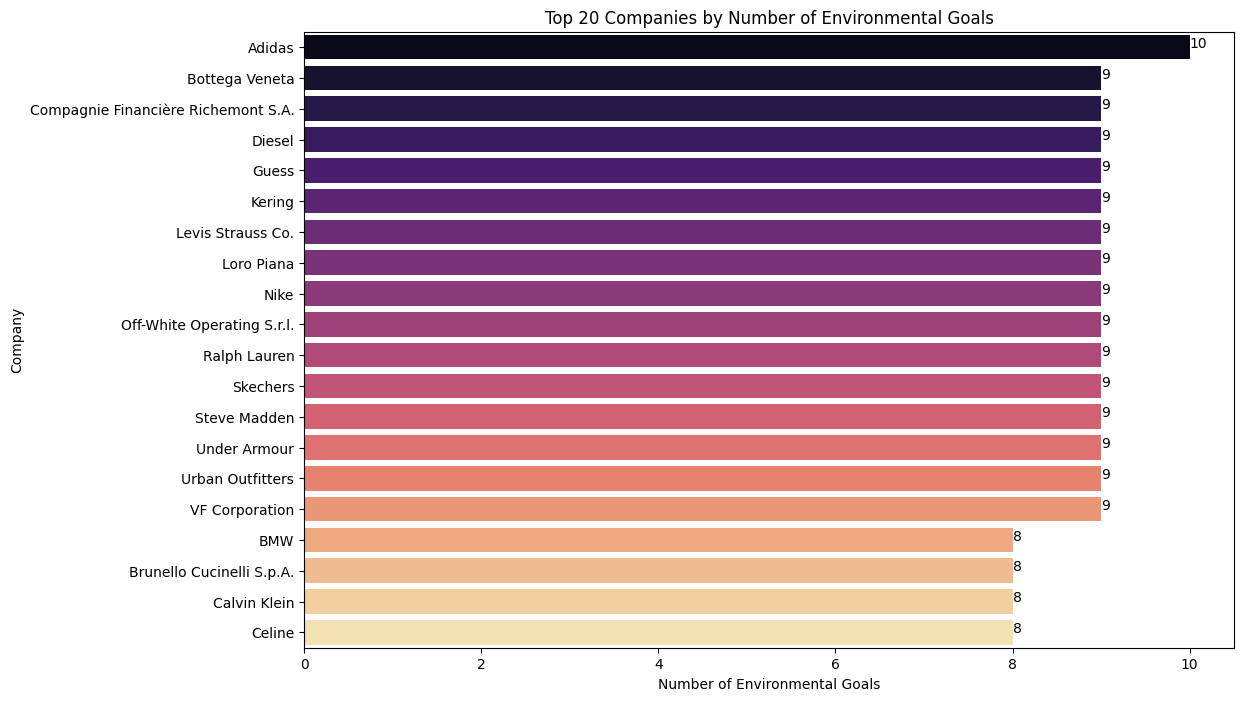

In [55]:
# 2. Number of Goals per Company (Top 20)
# Calculate the number of goals set by each company
goals_per_company = df[goal_columns].notnull().sum(axis=1)
df['Total Goals'] = goals_per_company  # Add a total goals column for visualization

# Get the top 20 companies with the most goals
top_companies = df.nlargest(20, 'Total Goals')

# Visualize Number of Goals per Company (Top 20)
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Goals', y='BRAND', data=top_companies, palette="magma")
plt.title('Top 20 Companies by Number of Environmental Goals')
plt.xlabel('Number of Environmental Goals')
plt.ylabel('Company')
for index, value in enumerate(top_companies['Total Goals']):
    plt.text(value, index, str(value))
plt.show()


C:\Users\Spin\AppData\Local\Temp\ipykernel_25944\2872021973.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_goals_per_sector.values, y=average_goals_per_sector.index, palette="cubehelix")


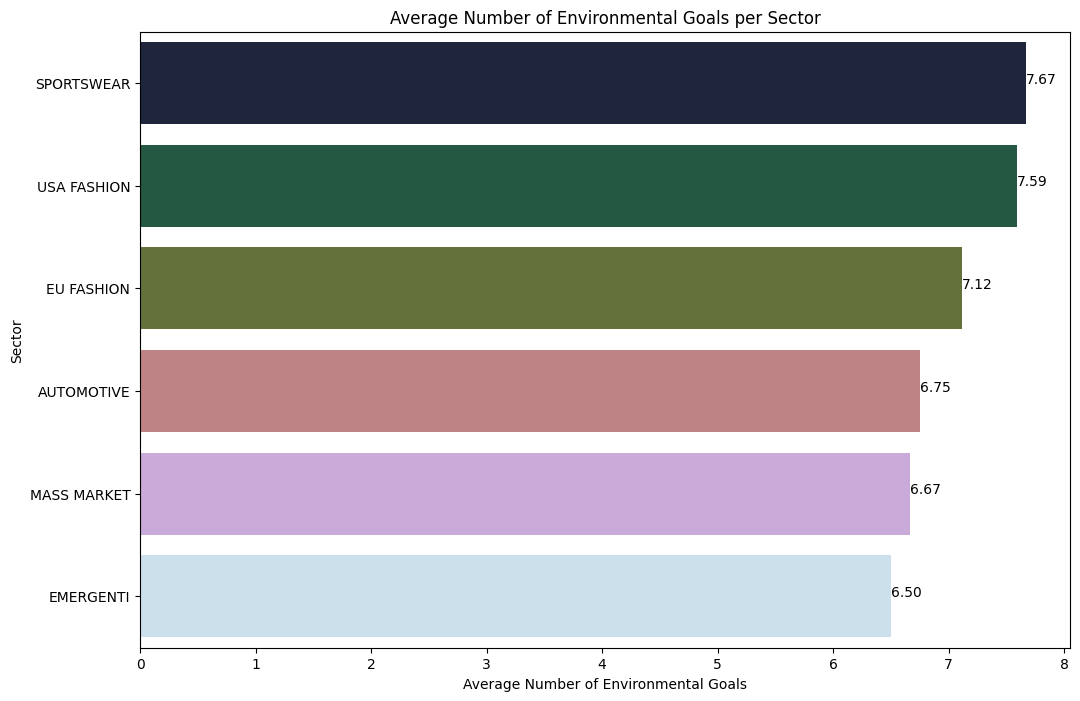

In [56]:
# 3. Average Number of Goals per Sector
# Calculate the average number of goals set by companies within each sector
average_goals_per_sector = df.groupby('SECTOR')['Total Goals'].mean().sort_values(ascending=False)

# Visualize Average Number of Goals per Sector
plt.figure(figsize=(12, 8))
sns.barplot(x=average_goals_per_sector.values, y=average_goals_per_sector.index, palette="cubehelix")
plt.title('Average Number of Environmental Goals per Sector')
plt.xlabel('Average Number of Environmental Goals')
plt.ylabel('Sector')
for index, value in enumerate(average_goals_per_sector.values):
    plt.text(value, index, f"{value:.2f}")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


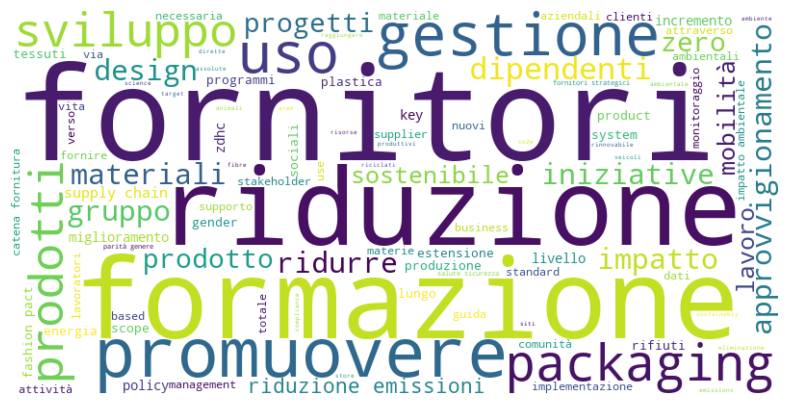

C:\Users\Spin\AppData\Local\Temp\ipykernel_25944\2281719385.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(frequencies), y=np.array(words), palette="viridis")


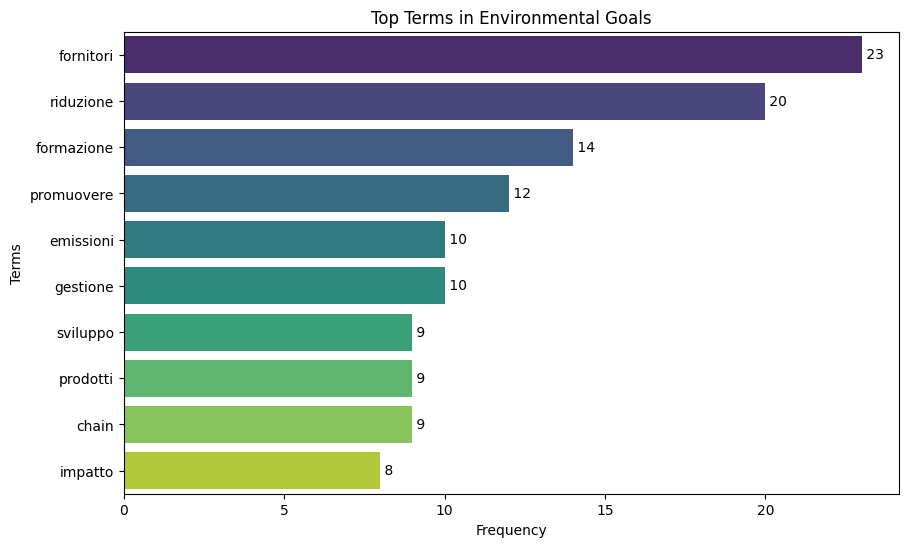

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from collections import Counter
import numpy as np

# Download NLTK stopwords for English and Italian (run this once)
nltk.download('stopwords')

# Combine English and Italian stopwords from NLTK
stopwords_combined = set(stopwords.words('english')) | set(stopwords.words('italian'))

# Example environmental goals (replace with your actual data)
goals = df.columns[20:]

# Basic Preprocessing: Lowercasing and removing punctuation/stopwords
processed_text = ' '.join(goals).lower()  # Lowercase all text
tokens = processed_text.split()  # Tokenize by splitting
tokens = [word for word in tokens if word not in stopwords_combined]  # Remove stopwords

# Generate Word Cloud
wordcloud = WordCloud(stopwords=stopwords_combined, background_color="white", max_words=100, width=800, height=400).generate(' '.join(tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generate Bar Chart for Top Terms
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)  # Adjust as needed
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=np.array(frequencies), y=np.array(words), palette="viridis")
plt.title('Top Terms in Environmental Goals')
plt.xlabel('Frequency')
plt.ylabel('Terms')
for index, value in enumerate(frequencies):
    plt.text(value, index, f" {value}", va='center')
plt.show()


In [66]:
df_dropped = df.dropna(axis=1, how='all')

In [73]:
df.columns[20]

'HELPING LIMIT GLOBAL WARMING TO 1.5 °C'

In [5]:
df

,Unnamed: 0,BRAND,ID,SECTOR,PRODUCT CATEGORY,COUNTRY,BUSINESS MODEL,CONGLOMERATE/Gruppo di riferimento,Market segment,Core business,...,"Modelli di business basati sui dati, nuovi servizi di mobilità e guida automatizzata",Fornire servizi di ricarica e di energia e investire nella costruzione di una rete aperta di ricarica rapida,Platform-based vehicles integrated with key technologies,Sviluppare nuovo mobility portfolio,PUBLICATION OF A GROUP SUSTAINABILITY REPORT WITH GRI STANDARDS,Richiedere ai fornitori di auto-valutarsi e di rendicontare le proprie performance ambientali,Environmental Goal Set,Total Goals,Aggregated_Goals,Cluster
0,0,&Other Stories,MM1,MASS MARKET,APP,SWE,BRD,H&M Group,BRIDGE,APP,...,NaN,NaN,NaN,NaN,NaN,NaN,True,6,Fashion Pact: Uso e approvvigionamento materie...,3
1,1,ACNE Studios,E1,EMERGENTI,APP,SWE,BRD,Acne Studios AB,BRIDGE,APP,...,NaN,NaN,NaN,NaN,NaN,NaN,True,6,Riduzione emissioni GHG assolute dello Scope 1...,3
2,2,Adidas,S1,SPORTSWEAR,ACTIVE WEAR,GER,BRD,Adidas Group,MM,ACTIVE WEAR,...,NaN,NaN,NaN,NaN,NaN,NaN,True,10,Riduzione emissioni GHG assolute dello Scope 1...,3
3,3,Audi,A1,AUTOMOTIVE,Manufacturing & Industrial,GER,GROUP,Gruppo Volkswagen,NaN,Manufacturing & Industrial\n,...,NaN,NaN,NaN,2028.0,NaN,NaN,True,7,"Riduzione emissioni carboniche per prodotto, R...",3
4,4,Balenciaga,EU3,EU FASHION,APP,FRA,BRD,Kering Group,PRE,APP,...,NaN,NaN,NaN,NaN,NaN,NaN,True,6,Riduzione delle emissioni di CO2 dirette (Scop...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,78,Valentino,EU55,EU FASHION,APP,ITA,BRD,Valentino S.p.A,PRE,APP,...,NaN,NaN,NaN,NaN,2024.0,NaN,True,6,"Allinearsi ai target SBTi, Energia rinnovabile...",2
79,79,Vans,S10,SPORTSWEAR,SHOES,USA,BRD,VF Corporation,MM,SHOES,...,NaN,NaN,NaN,NaN,NaN,NaN,True,6,"Approvvigionamento materiali (fibre, tessuti…...",3
80,80,Versace,EU56,EU FASHION,APP,ITA,BRD,Capri Holdings Limited,PRE,APP,...,NaN,NaN,NaN,NaN,NaN,NaN,True,8,Riduzione emissioni GHG assolute dello Scope 1...,3
81,81,VF Corporation,MM15,MASS MARKET,ALL,USA,GROUP,VF Corporation,MID,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,True,9,Riduzione emissioni GHG assolute dello Scope 1...,2


In [111]:
# Download and prepare Italian stopwords
nltk.download('stopwords')
italian_stopwords = stopwords.words('italian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
goal_columns = df.columns[20:] 
df['Aggregated_Goals'] = df.apply(lambda x: ', '.join(goal_columns[x[goal_columns].notnull()]), axis=1)
df

,BRAND,ID,SECTOR,PRODUCT CATEGORY,COUNTRY,BUSINESS MODEL,CONGLOMERATE/Gruppo di riferimento,Market segment,Core business,Business segment,...,"Piattaforma meccatronica elettrica, digitale e scalabile per fornire ai clienti in modo rapido ed efficiente funzioni e tecnologie innovative","Modelli di business basati sui dati, nuovi servizi di mobilità e guida automatizzata",Fornire servizi di ricarica e di energia e investire nella costruzione di una rete aperta di ricarica rapida,Platform-based vehicles integrated with key technologies,Sviluppare nuovo mobility portfolio,PUBLICATION OF A GROUP SUSTAINABILITY REPORT WITH GRI STANDARDS,Richiedere ai fornitori di auto-valutarsi e di rendicontare le proprie performance ambientali,Environmental Goal Set,Total Goals,Aggregated_Goals
0,&Other Stories,MM1,MASS MARKET,APP,SWE,BRD,H&M Group,BRIDGE,APP,Accessories / Apparel / Bags / Fragrance / Jew...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6,Fashion Pact: Uso e approvvigionamento materie...
1,ACNE Studios,E1,EMERGENTI,APP,SWE,BRD,Acne Studios AB,BRIDGE,APP,Accessories / Apparel / Bags / Denim / Shoes /...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6,Riduzione emissioni GHG assolute dello Scope 1...
2,Adidas,S1,SPORTSWEAR,ACTIVE WEAR,GER,BRD,Adidas Group,MM,ACTIVE WEAR,Accessories / Active Wear / Apparel / Bags / F...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,10,Riduzione emissioni GHG assolute dello Scope 1...
3,Audi,A1,AUTOMOTIVE,Manufacturing & Industrial,GER,GROUP,Gruppo Volkswagen,NaN,Manufacturing & Industrial\n,car services\ndistribution\nelectric vehicles\...,...,NaN,NaN,NaN,NaN,2028.0,NaN,NaN,True,7,"Riduzione emissioni carboniche per prodotto, R..."
4,Balenciaga,EU3,EU FASHION,APP,FRA,BRD,Kering Group,PRE,APP,Accessories / Apparel / Bags / Denim / Fragran...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6,Riduzione delle emissioni di CO2 dirette (Scop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Valentino,EU55,EU FASHION,APP,ITA,BRD,Valentino S.p.A,PRE,APP,Accessories / Apparel / Bags / Denim / Fragran...,...,NaN,NaN,NaN,NaN,NaN,2024.0,NaN,True,6,"Allinearsi ai target SBTi, Energia rinnovabile..."
79,Vans,S10,SPORTSWEAR,SHOES,USA,BRD,VF Corporation,MM,SHOES,Accessories / Apparel / Bags / Shoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6,"Approvvigionamento materiali (fibre, tessuti…..."
80,Versace,EU56,EU FASHION,APP,ITA,BRD,Capri Holdings Limited,PRE,APP,Accessories / Apparel / Bags / Denim / Fragran...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,8,Riduzione emissioni GHG assolute dello Scope 1...
81,VF Corporation,MM15,MASS MARKET,ALL,USA,GROUP,VF Corporation,MID,ALL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,9,Riduzione emissioni GHG assolute dello Scope 1...


In [114]:
vectorizer = TfidfVectorizer(stop_words=italian_stopwords)
X = vectorizer.fit_transform(df['Aggregated_Goals'])
X

<83x789 sparse matrix of type '<class 'numpy.float64'>'
	with 5738 stored elements in Compressed Sparse Row format>

In [115]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
print(clusters)

[3 3 3 3 4 3 3 1 2 3 3 0 2 2 3 1 3 2 3 2 3 3 3 1 3 0 2 1 1 3 3 1 3 3 2 3 3
 1 0 1 3 2 4 3 2 2 3 2 1 3 3 3 2 0 1 1 0 1 1 0 0 3 3 3 4 1 3 2 2 3 2 3 3 2
 3 3 3 0 2 3 3 2 0]


C:\Users\Spin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Spin\AppData\Local\Temp\ipykernel_25944\1318992624.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


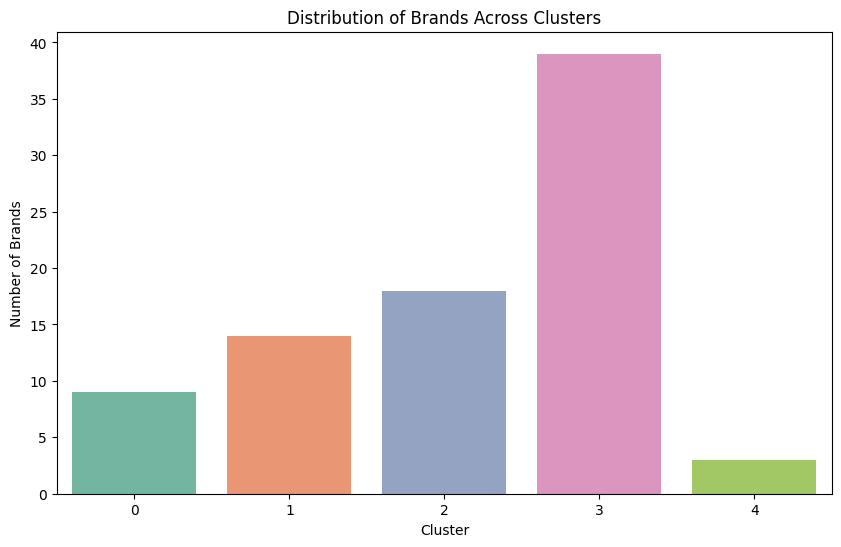

In [116]:
# Add cluster labels to the DataFrame
df['Cluster'] = clusters

### Step 4: Visualization - Number of Brands per Cluster

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Distribution of Brands Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Brands')
plt.show()

In [118]:
# Summary statistics for each cluster
print(df['Cluster'].value_counts())

# Proportions of brands in each cluster
print(df['Cluster'].value_counts(normalize=True))


Cluster
3    39
2    18
1    14
0     9
4     3
Name: count, dtype: int64
Cluster
3    0.469880
2    0.216867
1    0.168675
0    0.108434
4    0.036145
Name: proportion, dtype: float64


In [119]:
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    # Assuming ESG goals were aggregated into a 'Goals' column, replace with actual column names
    print(f"\nCluster {cluster} common goals:")
    print(cluster_data['Aggregated_Goals'].value_counts().head(5))



Cluster 0 common goals:
Aggregated_Goals
HELPING LIMIT GLOBAL WARMING TO 1.5 °C, Raggiungimento della Carbon Neutrality/net zero, Trasporto: decreasing emissions in inbound, outbound & last mile delivery, Incremento spedizioni via mare, Iniziative per la riduzione dell’impatto ambientale imputabile ai flussi distributivi e logistici, Energia rinnovabile in tutte le sedi/operations, Progetti di compensazione e rigenerazione per la tutela degli ecosistemi, delle specie protette e in via di estinzione e della biodiversità, Offset unavoidable emissions through natural climate solutions and other carbon credits, Uso materiale certificato, Packaging restituibile/riciclabile/proveniente da fonti sostenibili, Riduzione peso/volume packaging, Estensione delle attività di ricerca e sviluppo su materiali alternativi , Collaborazione con i fornitori per il miglioramento degli standard sociali e ambientali lungo la filiera, e rafforzamento monitoraggio della stessa, Promote education and awareness

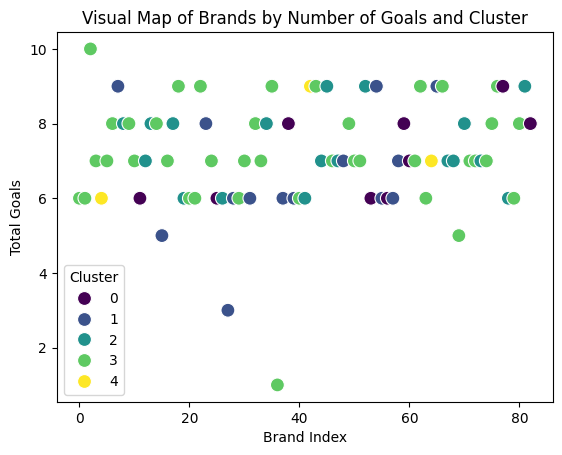

In [124]:
sns.scatterplot(
    x=df.index,  # Use the DataFrame index as the x value
    y='Total Goals',  # Number of goals on the y-axis
    hue='Cluster',  # Color by cluster
    data=df,
    palette='viridis',  # Color palette for clusters
    legend='full',  # Include legend to explain colors
    s=100  # Size of the markers
)
plt.title('Visual Map of Brands by Number of Goals and Cluster')
plt.xlabel('Brand Index')
plt.ylabel('Total Goals')
plt.legend(title='Cluster')
plt.show()

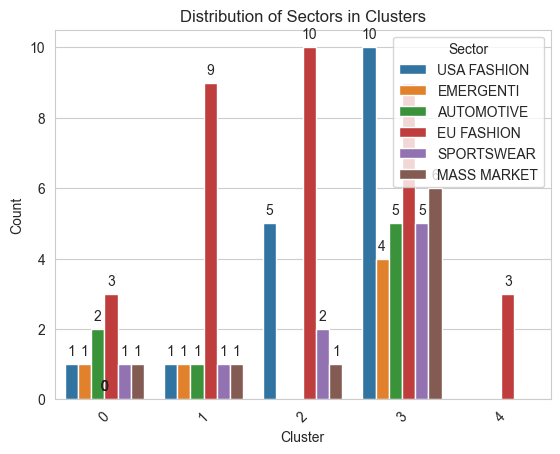

In [127]:
sns.set_style("whitegrid")  # Setting seaborn style

# Creating the count plot
ax = sns.countplot(data=df, x='Cluster', hue='SECTOR')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Sectors in Clusters')
plt.xticks(rotation=45)
plt.legend(title='Sector')

# Adding numbers on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()


In [1]:
import pandas as pd
df = pd.read_csv('df_final.csv')

In [12]:
X = df[['SECTOR', 'PRODUCT CATEGORY', 'COUNTRY', 'BUSINESS MODEL', 
        'CONGLOMERATE/Gruppo di riferimento', 'Market segment', 
        'Core business', 'Business segment', 'Targets', 'Listing', 
        'Country', 'Business model', 'Conglomerate/ Company/ Gruppo di riferimento', 
        'Employees', 'Fatturato (Euro) FY, 2022', 'Utile lordo FY, 2022', 
        'Utile/perdita FY, 2022', 'Non-financial disclosure']]
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [9]:
df.isna().sum()

Unnamed: 0                                                                                        0
BRAND                                                                                             0
ID                                                                                                0
SECTOR                                                                                            0
PRODUCT CATEGORY                                                                                  0
                                                                                                 ..
Richiedere ai fornitori di auto-valutarsi e di rendicontare le proprie performance ambientali    82
Environmental Goal Set                                                                            0
Total Goals                                                                                       0
Aggregated_Goals                                                                                  0


In [11]:
df_cols = list(df.columns)
df_cols

['Unnamed: 0',
 'BRAND',
 'ID',
 'SECTOR',
 'PRODUCT CATEGORY',
 'COUNTRY',
 'BUSINESS MODEL',
 'CONGLOMERATE/Gruppo di riferimento',
 'Market segment',
 'Core business',
 'Business segment',
 'Targets',
 'Listing',
 'Country',
 'Business model',
 'Conglomerate/ Company/ Gruppo di riferimento',
 'Employees',
 'Fatturato (Euro) FY, 2022',
 'Utile lordo FY, 2022',
 'Utile/perdita FY, 2022',
 'Non-financial disclosure',
 'HELPING LIMIT GLOBAL WARMING TO 1.5 °C',
 'Riduzione delle emissioni di CO2 dirette (Scope 1)',
 'Riduzione delle emissioni di CO2 indirette (Scope 2 e 3)',
 'Riduzione emissioni GHG assolute dello Scope 1 e Scope 2 (science-based target)',
 'Riduzione emissioni GHG assolute dello Scope 3 (science-based target)',
 'Riduzione emissioni carboniche per prodotto',
 'Riduzione emissioni assolute nei negozi e nella casa-madre',
 'Allinearsi ai target SBTi',
 'Dimezzare le emissioni di GHG e CO2e',
 'Raggiungimento della Carbon Neutrality/net zero',
 'Raggiungimento Climate Pos

In [13]:
pred_cols = ['BRAND',
 'ID',
 'SECTOR',
 'PRODUCT CATEGORY',
 'COUNTRY',
 'BUSINESS MODEL',
 'CONGLOMERATE/Gruppo di riferimento',
 'Market segment',
 'Core business',
 'Business segment',
 'Targets',
 'Listing',
 'Country',
 'Business model',
 'Conglomerate/ Company/ Gruppo di riferimento',
 'Employees',
 'Fatturato (Euro) FY, 2022',
 'Utile lordo FY, 2022',
 'Utile/perdita FY, 2022',
 'Non-financial disclosure', 'Cluster']
df_pred = df[pred_cols]
df_pred.head(2)

,BRAND,ID,SECTOR,PRODUCT CATEGORY,COUNTRY,BUSINESS MODEL,CONGLOMERATE/Gruppo di riferimento,Market segment,Core business,Business segment,...,Listing,Country,Business model,Conglomerate/ Company/ Gruppo di riferimento,Employees,"Fatturato (Euro) FY, 2022","Utile lordo FY, 2022","Utile/perdita FY, 2022",Non-financial disclosure,Cluster
0,&Other Stories,MM1,MASS MARKET,APP,SWE,BRD,H&M Group,BRIDGE,APP,Accessories / Apparel / Bags / Fragrance / Jew...,...,STK,SWE,BRD,H&M Group,NaN,NaN,NaN,NaN,YES,3
1,ACNE Studios,E1,EMERGENTI,APP,SWE,BRD,Acne Studios AB,BRIDGE,APP,Accessories / Apparel / Bags / Denim / Shoes /...,...,N,SWE,BRD,Acne Studios AB,NaN,NaN,NaN,NaN,YES,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_pred.select_dtypes(include=['object', 'category']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df_pred[col] = le.fit_transform(df_pred[col].astype(str)) 


In [49]:
df1 = pd.read_csv('df_final.csv')

In [55]:
#df_agg = df1[['BRAND', 'ID', 'SECTOR', 'PRODUCT CATEGORY', 'COUNTRY', 'BUSINESS MODEL', 'CONGLOMERATE/Gruppo di riferimento', 'Market segment', 'Core business', 'Business segment', 'Targets', 'Listing', 'Country', 'Business model', 'Conglomerate/ Company/ Gruppo di riferimento', 'Employees', 'Fatturato (Euro) FY, 2022', 'Utile lordo FY, 2022', 'Utile/perdita FY, 2022', 'Non-financial disclosure', 'Environmental Goal Set', 'Total Goals', 'Aggregated_Goals']]
df_agg.head(1)

,BRAND,ID,SECTOR,PRODUCT CATEGORY,COUNTRY,BUSINESS MODEL,CONGLOMERATE/Gruppo di riferimento,Market segment,Core business,Business segment,...,Market segment_encoded,Core business_encoded,Business segment_encoded,Targets_encoded,Listing_encoded,Country_encoded,Business model_encoded,Conglomerate/ Company/ Gruppo di riferimento_encoded,Non-financial disclosure_encoded,Environmental Goal Set_encoded
0,&Other Stories,MM1,MASS MARKET,APP,SWE,BRD,H&M Group,BRIDGE,APP,Accessories / Apparel / Bags / Fragrance / Jew...,...,0,3,19,3,8,9,0,18,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['BRAND', 'ID', 'SECTOR', 'PRODUCT CATEGORY', 'COUNTRY', 'BUSINESS MODEL', 
                       'CONGLOMERATE/Gruppo di riferimento', 'Market segment', 'Core business', 
                       'Business segment', 'Targets', 'Listing', 'Country', 'Business model', 
                       'Conglomerate/ Company/ Gruppo di riferimento', 'Non-financial disclosure', 
                       'Environmental Goal Set']

label_value_mapping = []

for col in categorical_columns:
    df_agg[col] = df_agg[col].fillna('NaN').copy() 
    le = LabelEncoder()
    df_agg[col+'_encoded'] = le.fit_transform(df_agg[col])
    label_value_mapping.extend([{'Column': col, 
                                 'Encoded_Label': encoded_label, 
                                 'Original_Value': original_value} 
                                for encoded_label, original_value in enumerate(le.classes_)])

label_value_mapping_df = pd.DataFrame(label_value_mapping)

print(label_value_mapping_df)


In [56]:
list(df_agg.columns)

['BRAND',
 'ID',
 'SECTOR',
 'PRODUCT CATEGORY',
 'COUNTRY',
 'BUSINESS MODEL',
 'CONGLOMERATE/Gruppo di riferimento',
 'Market segment',
 'Core business',
 'Business segment',
 'Targets',
 'Listing',
 'Country',
 'Business model',
 'Conglomerate/ Company/ Gruppo di riferimento',
 'Employees',
 'Fatturato (Euro) FY, 2022',
 'Utile lordo FY, 2022',
 'Utile/perdita FY, 2022',
 'Non-financial disclosure',
 'Environmental Goal Set',
 'Total Goals',
 'Aggregated_Goals',
 'BRAND_encoded',
 'ID_encoded',
 'SECTOR_encoded',
 'PRODUCT CATEGORY_encoded',
 'COUNTRY_encoded',
 'BUSINESS MODEL_encoded',
 'CONGLOMERATE/Gruppo di riferimento_encoded',
 'Market segment_encoded',
 'Core business_encoded',
 'Business segment_encoded',
 'Targets_encoded',
 'Listing_encoded',
 'Country_encoded',
 'Business model_encoded',
 'Conglomerate/ Company/ Gruppo di riferimento_encoded',
 'Non-financial disclosure_encoded',
 'Environmental Goal Set_encoded']

In [61]:
df_encoded = df_agg[['BRAND_encoded',
 'ID_encoded',
 'SECTOR_encoded',
 'PRODUCT CATEGORY_encoded',
 'COUNTRY_encoded',
 'BUSINESS MODEL_encoded',
 'CONGLOMERATE/Gruppo di riferimento_encoded',
 'Market segment_encoded',
 'Employees',
 'Core business_encoded',
 'Business segment_encoded',
 'Targets_encoded',
 'Listing_encoded',
 'Country_encoded',
 'Business model_encoded',
 'Conglomerate/ Company/ Gruppo di riferimento_encoded',
 'Non-financial disclosure_encoded',
 'Environmental Goal Set_encoded','Total Goals',
 'Aggregated_Goals',]]

In [68]:
df_encoded.head(2)

,BRAND_encoded,ID_encoded,SECTOR_encoded,PRODUCT CATEGORY_encoded,COUNTRY_encoded,BUSINESS MODEL_encoded,CONGLOMERATE/Gruppo di riferimento_encoded,Market segment_encoded,Employees,Core business_encoded,...,Targets_encoded,Listing_encoded,Country_encoded,Business model_encoded,Conglomerate/ Company/ Gruppo di riferimento_encoded,Non-financial disclosure_encoded,Environmental Goal Set_encoded,Total Goals,Aggregated_Goals,Aggregated_Goals_processed
0,0,48,3,3,9,0,18,0,9485,3,...,3,8,9,0,18,1,0,6,Fashion Pact: Uso e approvvigionamento materie...,fashion pact uso approvvigionamento materie pr...
1,1,8,1,3,9,0,0,0,9485,3,...,5,4,9,0,0,1,0,6,Riduzione emissioni GHG assolute dello Scope 1...,riduzione emissioni ghg assolute scope 1 scope...


In [63]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

imputer = SimpleImputer(strategy='median')

column_values = df_encoded['Employees'].values.reshape(-1, 1)
df_encoded['Employees'] = imputer.fit_transform(column_values)

df_encoded.head(2)


C:\Users\Spin\AppData\Local\Temp\ipykernel_16196\2356342192.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Employees'] = imputer.fit_transform(column_values)


,BRAND_encoded,ID_encoded,SECTOR_encoded,PRODUCT CATEGORY_encoded,COUNTRY_encoded,BUSINESS MODEL_encoded,CONGLOMERATE/Gruppo di riferimento_encoded,Market segment_encoded,Employees,Core business_encoded,Business segment_encoded,Targets_encoded,Listing_encoded,Country_encoded,Business model_encoded,Conglomerate/ Company/ Gruppo di riferimento_encoded,Non-financial disclosure_encoded,Environmental Goal Set_encoded,Total Goals,Aggregated_Goals
0,0,48,3,3,9,0,18,0,9485.0,3,19,3,8,9,0,18,1,0,6,Fashion Pact: Uso e approvvigionamento materie...
1,1,8,1,3,9,0,0,0,9485.0,3,17,5,4,9,0,0,1,0,6,Riduzione emissioni GHG assolute dello Scope 1...


In [65]:
# Convert 'Employees' column to integer type
df_encoded['Employees'] = df_encoded['Employees'].astype(int)


C:\Users\Spin\AppData\Local\Temp\ipykernel_16196\303251610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Employees'] = df_encoded['Employees'].astype(int)


In [69]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

english_stopwords = set(stopwords.words('english'))
italian_stopwords = set(stopwords.words('italian'))

all_stopwords = english_stopwords.union(italian_stopwords)

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in all_stopwords]
    return ' '.join(filtered_tokens)

df_encoded['Aggregated_Goals_processed'] = df_encoded['Aggregated_Goals'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Spin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Spin\AppData\Local\Temp\ipykernel_16196\2178818163.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Aggregated_Goals_processed'] = df_encoded['Aggregated_Goals'].apply(preprocess_text)


In [76]:
df_encoded.head(2)

,BRAND_encoded,ID_encoded,SECTOR_encoded,PRODUCT CATEGORY_encoded,COUNTRY_encoded,BUSINESS MODEL_encoded,CONGLOMERATE/Gruppo di riferimento_encoded,Market segment_encoded,Employees,Core business_encoded,...,Targets_encoded,Listing_encoded,Country_encoded,Business model_encoded,Conglomerate/ Company/ Gruppo di riferimento_encoded,Non-financial disclosure_encoded,Environmental Goal Set_encoded,Total Goals,Aggregated_Goals,Aggregated_Goals_processed
0,0,48,3,3,9,0,18,0,9485,3,...,3,8,9,0,18,1,0,6,Fashion Pact: Uso e approvvigionamento materie...,fashion pact uso approvvigionamento materie pr...
1,1,8,1,3,9,0,0,0,9485,3,...,5,4,9,0,0,1,0,6,Riduzione emissioni GHG assolute dello Scope 1...,riduzione emissioni ghg assolute scope 1 scope...


In [102]:
list(df_encoded_with_tfidf_200.columns)

['BRAND_encoded',
 'ID_encoded',
 'SECTOR_encoded',
 'PRODUCT CATEGORY_encoded',
 'COUNTRY_encoded',
 'BUSINESS MODEL_encoded',
 'CONGLOMERATE/Gruppo di riferimento_encoded',
 'Market segment_encoded',
 'Employees',
 'Core business_encoded',
 'Business segment_encoded',
 'Targets_encoded',
 'Listing_encoded',
 'Country_encoded',
 'Business model_encoded',
 'Conglomerate/ Company/ Gruppo di riferimento_encoded',
 'Non-financial disclosure_encoded',
 'Environmental Goal Set_encoded',
 'Total Goals',
 'Aggregated_Goals',
 'Aggregated_Goals_processed',
 'Cluster',
 'academy',
 'ambientale',
 'ambientali',
 'ambienti',
 'applicato',
 'approccio',
 'approvvigionamento',
 'aree',
 'assolute',
 'attività',
 'attraverso',
 'aumentare',
 'avviarli',
 'biodiversità',
 'carbon',
 'catena',
 'certificato',
 'chain',
 'chimiche',
 'circolarità',
 'circular',
 'co',
 'coinvolgimento',
 'collaborazione',
 'compensazione',
 'competenze',
 'conferimento',
 'contributo',
 'corporate',
 'costituzione',
 '

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=200)

X_tfidf_200 = tfidf_vect.fit_transform(df_encoded['Aggregated_Goals_processed'])

tfidf_df_200 = pd.DataFrame(X_tfidf_200.toarray(), columns=tfidf_vect.get_feature_names_out())

df_encoded.reset_index(drop=True, inplace=True)

df_encoded_with_tfidf_200 = pd.concat([df_encoded, tfidf_df_200], axis=1)


In [126]:
df_encoded_with_tfidf_200.head(1)

,BRAND_encoded,ID_encoded,SECTOR_encoded,PRODUCT CATEGORY_encoded,COUNTRY_encoded,BUSINESS MODEL_encoded,CONGLOMERATE/Gruppo di riferimento_encoded,Market segment_encoded,Employees,Core business_encoded,...,veicoli,vergine,via,vintage,viscose,vita,wool,workforce,zdhc,zero
0,0,48,3,3,9,0,18,0,9485,3,...,0.0,0.229932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178491


In [101]:
df_encoded_with_tfidf_200['Cluster'].value_counts()

Cluster
1    44
4    17
0    12
3     6
2     4
Name: count, dtype: int64

In [98]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42) 
clusters = kmeans.fit_predict(X_pca)

df_encoded_with_tfidf_200['Cluster'] = clusters


C:\Users\Spin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [133]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np

X = df_encoded_with_tfidf_200[[
    'SECTOR_encoded',
    'PRODUCT CATEGORY_encoded',
    'COUNTRY_encoded',
    'BUSINESS MODEL_encoded',
    'CONGLOMERATE/Gruppo di riferimento_encoded',
    'Market segment_encoded',
    'Employees',
    'Core business_encoded',
    'Business segment_encoded',
    'Targets_encoded',
    'Listing_encoded',
    'Country_encoded',
    'Business model_encoded',
    'Conglomerate/ Company/ Gruppo di riferimento_encoded',
    'Non-financial disclosure_encoded'
]]
y = df_encoded_with_tfidf_200['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ros = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

classifiers = {
    "k-NN": KNeighborsClassifier(),
    "Naïve Bayes": GaussianNB(),
    "J48 Decision Tree": DecisionTreeClassifier(),
    "Multilayer Perceptron": MLPClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest" : RandomForestClassifier()
}

for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5)
    
    print(f"Cross-validation scores for {name}:")
    print("Mean:", np.mean(scores))
    print("Standard Deviation:", np.std(scores))
    
    classifier.fit(X_train_resampled, y_train_resampled)
    
    y_pred = classifier.predict(X_test)

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Cross-validation scores for k-NN:
Mean: 0.5942857142857143
Standard Deviation: 0.06101187572589323

Classification Report for k-NN:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.33      0.50         9
           2       0.20      1.00      0.33         1
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         4

    accuracy                           0.35        17
   macro avg       0.49      0.57      0.38        17
weighted avg       0.67      0.35      0.39        17

Confusion Matrix for k-NN:
[[1 0 0 0 1]
 [0 3 1 2 3]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 3 1 0]]


Cross-validation scores for Naïve Bayes:
Mean: 0.7142857142857142
Standard Deviation: 0.04040610178208844

Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.70      

C:\Users\Spin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: U

Cross-validation scores for Random Forest:
Mean: 0.8342857142857143
Standard Deviation: 0.06857142857142855

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.60      0.67      0.63         9
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.33      0.25      0.29         4

    accuracy                           0.53        17
   macro avg       0.49      0.48      0.48        17
weighted avg       0.51      0.53      0.52        17

Confusion Matrix for Random Forest:
[[1 1 0 0 0]
 [0 6 0 1 2]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 3 0 0 1]]




In [144]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 'int', 'float'])
    if max_features == 'int':
        max_features = trial.suggest_int('max_features_int', 1, 20)
    elif max_features == 'float':
        max_features = trial.suggest_float('max_features_float', 0.1, 0.9)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5)
    
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
trial = study.best_trial
print('  Value: {:.3f}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2024-03-11 12:49:20,930] A new study created in memory with name: no-name-6dc3858f-896a-4e31-93d1-fa3b47b80355
[I 2024-03-11 12:49:22,448] Trial 0 finished with value: 0.72 and parameters: {'n_estimators': 140, 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.72.
[I 2024-03-11 12:49:23,496] Trial 1 finished with value: 0.5828571428571429 and parameters: {'n_estimators': 119, 'max_depth': 24, 'min_samples_split': 14, 'min_samples_leaf': 18, 'max_features': 'int', 'max_features_int': 14}. Best is trial 0 with value: 0.72.
[I 2024-03-11 12:49:24,744] Trial 2 finished with value: 0.6342857142857143 and parameters: {'n_estimators': 190, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.72.
[I 2024-03-11 12:49:25,380] Trial 3 finished with value: 0.6742857142857143 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 17, 'min_sampl

Best trial:
  Value: 0.851
  Params: 
    n_estimators: 187
    max_depth: 11
    min_samples_split: 2
    min_samples_leaf: 1
    max_features: float
    max_features_float: 0.845665859920012


In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


X = df_encoded_with_tfidf_200[[
    'SECTOR_encoded',
    'PRODUCT CATEGORY_encoded',
    'COUNTRY_encoded',
    'BUSINESS MODEL_encoded',
    'CONGLOMERATE/Gruppo di riferimento_encoded',
    'Market segment_encoded',
    'Employees',
    'Core business_encoded',
    'Business segment_encoded',
    'Targets_encoded',
    'Listing_encoded',
    'Country_encoded',
    'Business model_encoded',
    'Conglomerate/ Company/ Gruppo di riferimento_encoded',
    'Non-financial disclosure_encoded'
]]
y = df_encoded_with_tfidf_200['Cluster']

pipeline = Pipeline([
    ('SMOTE', SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)),
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=187,
                                                      max_depth=11,
                                                      min_samples_split=2,
                                                      min_samples_leaf=1,
                                                      max_features=0.845665859920012,
                                                      random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())


C:\Users\Spin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.41176471 0.52941176 0.70588235 0.4375     0.625     ]
Mean accuracy: 0.5419117647058823
Standard deviation of accuracy: 0.11116324228802504
